In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("Womens Clothing Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [7]:
df_X=df['Review Text']


In [8]:
df_y=df['Rating']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=101)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf=TfidfVectorizer(stop_words="english")

In [13]:
X_train=tfidf.fit_transform(X_train)

In [14]:
X_test=tfidf.transform(X_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report

In [16]:
Multi_nb= MultinomialNB()

In [17]:
Multi_nb.fit(X_train,y_train )

MultinomialNB()

In [18]:
ls=LogisticRegression( max_iter=1000)

In [19]:
ls.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [21]:
linearsvc= LinearSVC()

In [22]:
linearsvc.fit(X_train, y_train)

LinearSVC()

In [23]:
def report (model):
    y_pred=model.predict(X_test)
    
    print("Classification Report \n")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score: ", accuracy_score(y_test,y_pred))
    
    print("Confusion Matrix  \n")
    plot_confusion_matrix(model, X_test, y_test)

Model: Multinomial
Classification Report 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           2       0.00      0.00      0.00       381
           3       0.21      0.01      0.01       716
           4       0.29      0.01      0.01      1334
           5       0.56      1.00      0.72      3277

    accuracy                           0.56      5899
   macro avg       0.21      0.20      0.15      5899
weighted avg       0.40      0.56      0.40      5899

Accuracy Score:  0.5577216477369046
Confusion Matrix  



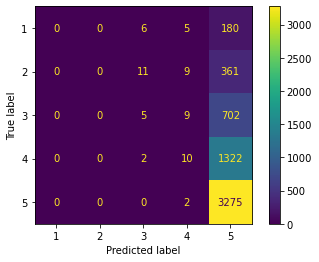

In [24]:
print("Model: Multinomial")
report(Multi_nb)

Model: Logistic Regression
Classification Report 

              precision    recall  f1-score   support

           1       0.50      0.09      0.15       191
           2       0.35      0.17      0.23       381
           3       0.40      0.37      0.38       716
           4       0.43      0.27      0.33      1334
           5       0.72      0.91      0.80      3277

    accuracy                           0.63      5899
   macro avg       0.48      0.36      0.38      5899
weighted avg       0.58      0.63      0.59      5899

Accuracy Score:  0.6270554331242584
Confusion Matrix  



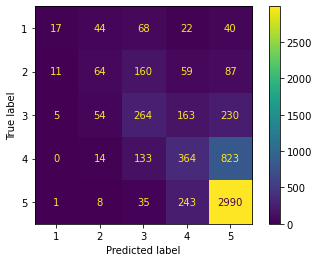

In [25]:
print("Model: Logistic Regression")
report(ls)

Model: SVC
Classification Report 

              precision    recall  f1-score   support

           1       0.50      0.04      0.07       191
           2       0.36      0.06      0.10       381
           3       0.39      0.40      0.39       716
           4       0.43      0.20      0.27      1334
           5       0.69      0.94      0.80      3277

    accuracy                           0.62      5899
   macro avg       0.47      0.33      0.33      5899
weighted avg       0.57      0.62      0.56      5899

Accuracy Score:  0.622478386167147
Confusion Matrix  



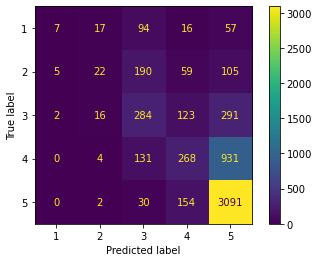

In [26]:
print("Model: SVC")
report(svc)

Model: Linear SVC
Classification Report 

              precision    recall  f1-score   support

           1       0.39      0.20      0.27       191
           2       0.30      0.22      0.25       381
           3       0.37      0.34      0.35       716
           4       0.40      0.29      0.33      1334
           5       0.73      0.87      0.80      3277

    accuracy                           0.61      5899
   macro avg       0.44      0.38      0.40      5899
weighted avg       0.57      0.61      0.58      5899

Accuracy Score:  0.6107814883878624
Confusion Matrix  



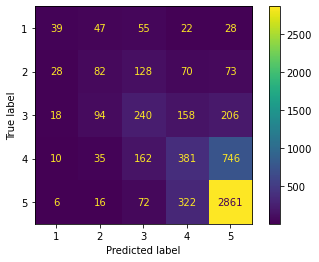

In [27]:
print("Model: Linear SVC")
report(linearsvc)

## Hyperparameter tuning on Linear SVM

In [28]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal, uniform

params= {'penalty': ['l1', 'l2'], 'loss':['hinge'],  'C'  : [0.1, 0.01.1.0, 10]}

In [32]:
param_distributions = {"gamma": [0.001, 0.1], "C":[1, 10]}

In [33]:
grid=GridSearchCV(estimator=svc, param_grid=param_distributions, cv=5)

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.001, 0.1]})

In [35]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [36]:
grid.best_score_

0.6142552469187946

Classification Report 

              precision    recall  f1-score   support

           1       0.30      0.18      0.22       191
           2       0.27      0.24      0.26       381
           3       0.40      0.40      0.40       716
           4       0.42      0.29      0.34      1334
           5       0.75      0.88      0.81      3277

    accuracy                           0.62      5899
   macro avg       0.43      0.40      0.41      5899
weighted avg       0.59      0.62      0.60      5899

Accuracy Score:  0.6206136633327682
Confusion Matrix  



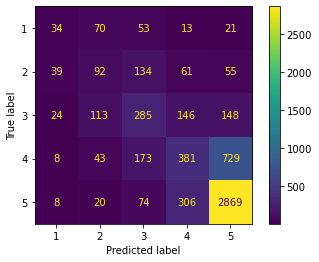

In [37]:
report(grid)

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe=Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [40]:
pipe.fit(df_X , df_y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [41]:
tweet=["poor fitting"]

In [42]:
print(pipe.predict(tweet))

[1]


In [43]:
tweet=["nice soft cloth"]

In [44]:
print(pipe.predict(tweet))

[5]
